<a href="https://colab.research.google.com/github/vahedshaik/cmpe258_neural_networks/blob/main/Asst3_part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Generate non-linear data and Initialize weights and bias
n = 1000
dim = 3
x = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', x.shape)

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

Input shape = (1000, 3)
x: (1000, 3), weights: (3, 2), bias: (2,), y: (1000, 2)


**Visualizing the data generated using TSNE**

In [ ]:
from sklearn.manifold import TSNE
view = TSNE(n_components=3, n_jobs=4).fit_transform(x)
view.shape

(1000, 3)

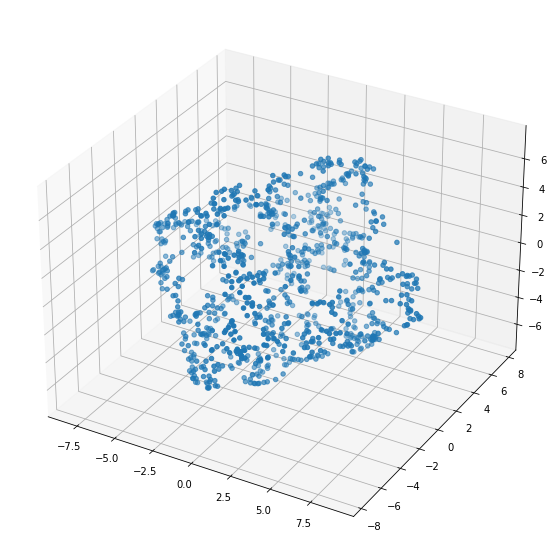

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(20,10))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

Hyperparamter initializations

In [ ]:
input_dim = dim
output_dim = 1
hidden_dim = 20

learning_rate = 0.01
num_epochs = 60

# Linear layer class

In [ ]:
class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    self.x = x
    return np.einsum('ij, jk -> ik', x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk -> ik', self.x.T, gradient) 
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = np.einsum('ij, jk -> ik', gradient, self.weights.T) 
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - (lr * self.weights_gradient)
    self.bias = self.bias - (lr * self.bias_gradient)

# Error function - Mean Square Error

In [ ]:
class MeanSquareError:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((self.y_pred - self.y_true) ** 2).mean()

  def backward(self):
    self.n = self.y_true.shape[0]
    self.gradient = (2.0 * (self.y_pred - self.y_true)) /  n
    return self.gradient

# Non-Linearity using ReLu


In [ ]:
class ReLu:
  def __call__(self, input):
    self.input = input
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input > 0) * output_gradient
    return self.input_gradient

# Non-linear model

In [ ]:
class Model:
  def __init__(self, input_dim, output_dim , hidden_dim):
    self.linear1 = Linear(input_dim, hidden_dim)
    self.relu1 = ReLu()
    self.linear2 = Linear(hidden_dim, hidden_dim)
    self.relu2 = ReLu()
    self.linear3 = Linear(hidden_dim, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

# Traning non-linear model

In [ ]:
loss_ = []

def fit(x, y_true, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(lr)
    loss_.append(loss_value)
  return loss_

# Initialise model and loss and train model

In [ ]:

loss = MeanSquareError()
model = Model(input_dim, output_dim, hidden_dim)

loss_ = fit(x, y_true, model, loss, learning_rate, num_epochs)

Epoch 0, loss 3.5361546206737136
Epoch 1, loss 3.40049859300774
Epoch 2, loss 3.2722163975507845
Epoch 3, loss 3.150547468635633
Epoch 4, loss 3.0345396893951966
Epoch 5, loss 2.923289130220337
Epoch 6, loss 2.815699041418067
Epoch 7, loss 2.711891550917596
Epoch 8, loss 2.6109781889515924
Epoch 9, loss 2.513132349892982
Epoch 10, loss 2.417867302200639
Epoch 11, loss 2.3257936337536447
Epoch 12, loss 2.236810721038518
Epoch 13, loss 2.150468393425891
Epoch 14, loss 2.0668227800058916
Epoch 15, loss 1.985456910344265
Epoch 16, loss 1.9067459665830249
Epoch 17, loss 1.8303950397175568
Epoch 18, loss 1.757020714370141
Epoch 19, loss 1.6861408300205758
Epoch 20, loss 1.6182555116094168
Epoch 21, loss 1.5530989894833078
Epoch 22, loss 1.490820182417935
Epoch 23, loss 1.4316910875943751
Epoch 24, loss 1.3755667532809372
Epoch 25, loss 1.3224529815516872
Epoch 26, loss 1.272235147080351
Epoch 27, loss 1.2248820810831373
Epoch 28, loss 1.1804043644017332
Epoch 29, loss 1.1385773432140582
Epoc

# Plot epoch vs loss

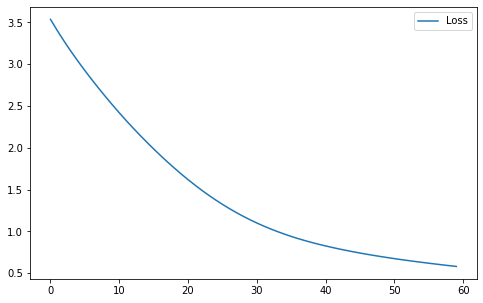

In [ ]:


plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

# Initialise model and loss 

In [ ]:
loss = MeanSquareError()
model = Model(input_dim, output_dim, hidden_dim)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(learning_rate)
y_pred = model(x)

Text(0, 0.5, 't-SNE-2')

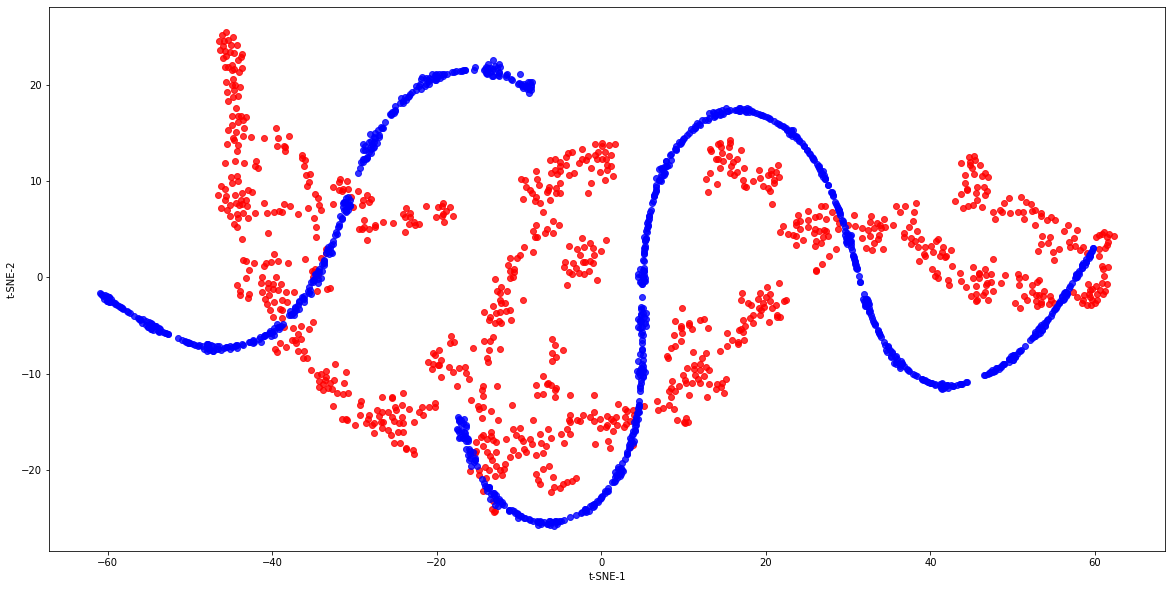

In [ ]:
 from sklearn.manifold import TSNE
 view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
 view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
 plt.figure(figsize=(20,10))
 plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.8)
 plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.8)
 plt.xlabel('t-SNE-1')
 plt.ylabel('t-SNE-2')